In [127]:
import random
import os
import pandas as pd
import shutil
import librosa as lb
from sklearn.preprocessing import MinMaxScaler 
import statistics
import numpy as np
from librosa import display
import soundfile as sf
from IPython.display import Audio

# Reading dataset

In [2]:
dataset = 'wav_normalized'

In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,filename,label
0,test_011.wav,positive
1,test_108.wav,positive
2,test_087.wav,negative
3,test_101.wav,negative
4,test_052.wav,positive


In [4]:
positive = []
negative = []
for index, row in df_test.iterrows():
    name = row['filename']
    label = row['label']
    if label == 'positive':
        positive.append(name)
    else :
        negative.append(name)

In [5]:
print('positive:',len(positive),', negative:',len(negative))

positive: 39 , negative: 169


In [6]:
sample_positive = int(0.2*len(positive))
sample_negative = int(0.2*len(negative))

In [7]:
print('sampel-positive:', sample_positive, ', sampel-negative:', sample_negative)

sampel-positive: 7 , sampel-negative: 33


In [57]:
index_positive = []
for i in range(0,7):
    n = random.randint(0,39)
    index_positive.append(n)

fn_positive = []
for idx in index_positive:
    fn = positive[idx]
    fn_positive.append(fn)
    
print(fn_positive)

['test_124.wav', 'test_156.wav', 'test_197.wav', 'test_085.wav', 'test_011.wav', 'test_147.wav', 'test_159.wav']


In [60]:
index_negative = []
for i in range(0,33):
    n = random.randint(0,169)
    index_negative.append(n)

fn_negative = []
for idx in index_negative:
    fn = negative[idx]
    fn_negative.append(fn)
    
print(fn_negative)

['test_174.wav', 'test_049.wav', 'test_118.wav', 'test_120.wav', 'test_018.wav', 'test_202.wav', 'test_057.wav', 'test_045.wav', 'test_203.wav', 'test_166.wav', 'test_072.wav', 'test_183.wav', 'test_199.wav', 'test_160.wav', 'test_018.wav', 'test_142.wav', 'test_081.wav', 'test_023.wav', 'test_055.wav', 'test_095.wav', 'test_170.wav', 'test_131.wav', 'test_165.wav', 'test_051.wav', 'test_097.wav', 'test_025.wav', 'test_203.wav', 'test_180.wav', 'test_173.wav', 'test_152.wav', 'test_024.wav', 'test_063.wav', 'test_129.wav']


# making folders

In [61]:
if os.path.exists('segmentation')==False:
    os.mkdir('segmentation')

In [62]:
if os.path.exists('segmentation/positive')==False:
    os.mkdir('segmentation/positive')

In [63]:
if os.path.exists('segmentation/negative')==False:
    os.mkdir('segmentation/negative')

In [64]:
for i in fn_positive:
    source = os.path.join(dataset,i)
    loc = os.path.join('segmentation','positive',i)
    shutil.copy(source,loc)

In [65]:
for i in fn_negative:
    source = os.path.join(dataset,i)
    loc = os.path.join('segmentation','negative',i)
    shutil.copy(source,loc)

# reading audio

In [66]:
wav_positive = []
for i in fn_positive:
    fn = os.path.join(dataset,i)
    wav,sr = lb.load(fn,sr=None)
    wav_positive.append(wav)

In [67]:
wav_negative = []
for i in fn_negative:
    fn = os.path.join(dataset,i)
    wav,sr = lb.load(fn,sr=None)
    wav_negative.append(wav)

# plot

In [68]:
from pyAudioAnalysis import ShortTermFeatures
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Scaler = MinMaxScaler(feature_range=(0,1))

In [69]:
rms.shape

(93, 1)

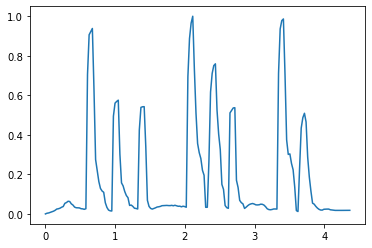

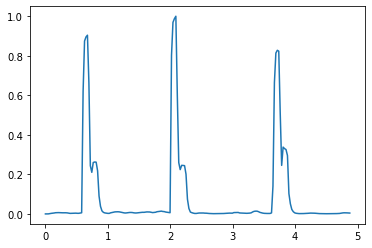

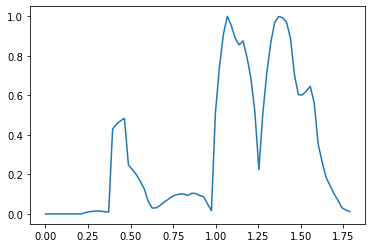

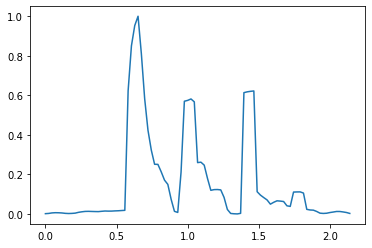

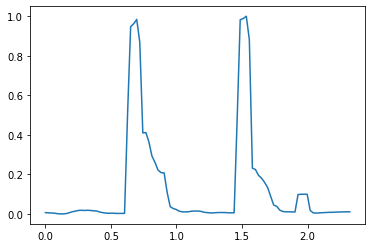

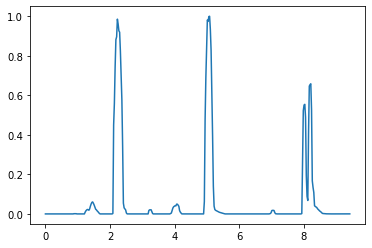

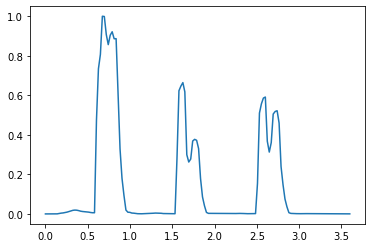

In [70]:
for i in wav_positive:
    rms = lb.feature.rms(y=i)
    times = lb.times_like(rms)
    rms = rms.reshape(rms.shape[1],rms.shape[0])
    rms_norm = Scaler.fit_transform(rms)
    #print(rms_norm)
    plt.figure()
    plt.plot(times, rms_norm, label='RMS Energy')
    plt.show()

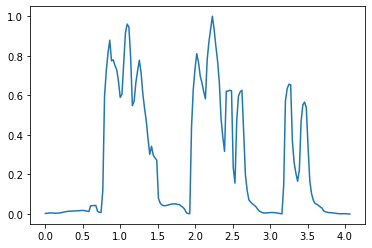

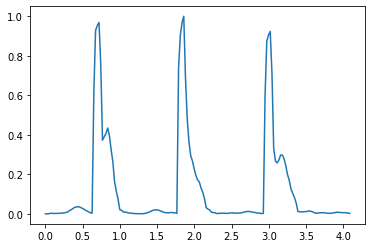

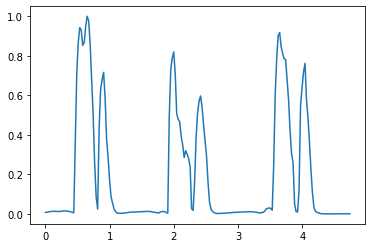

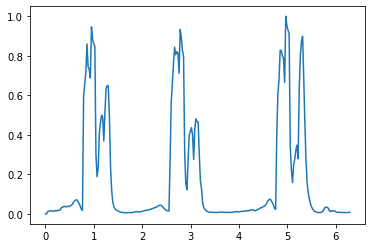

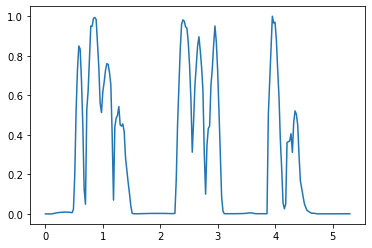

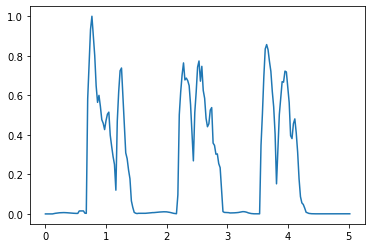

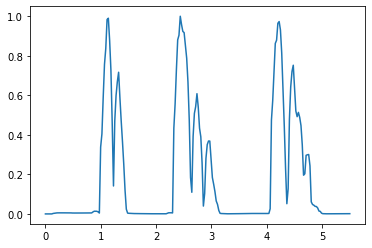

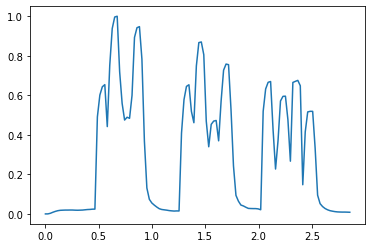

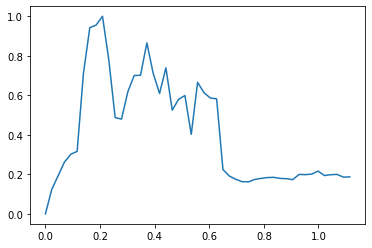

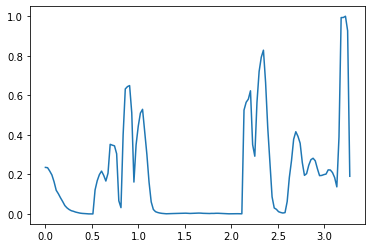

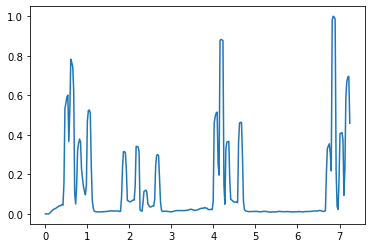

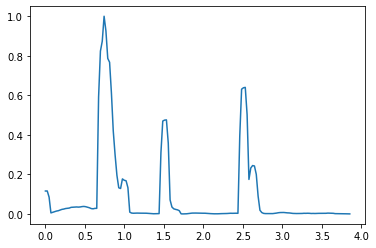

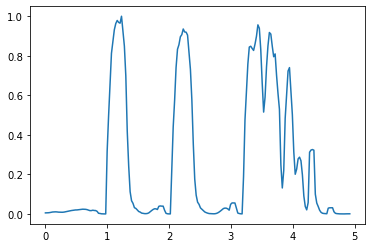

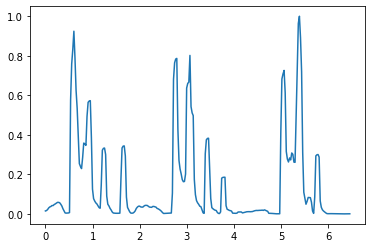

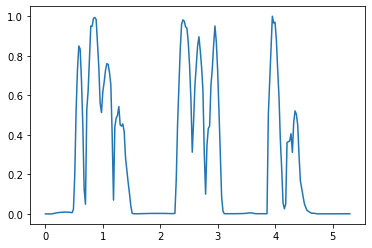

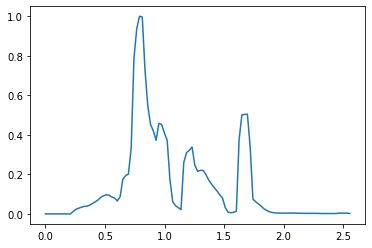

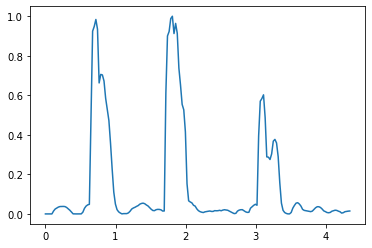

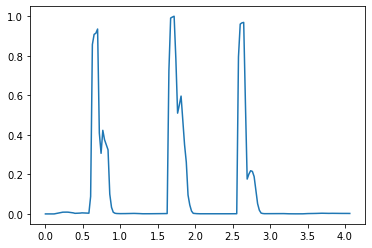

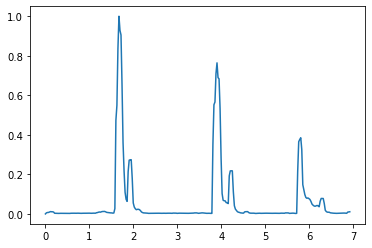

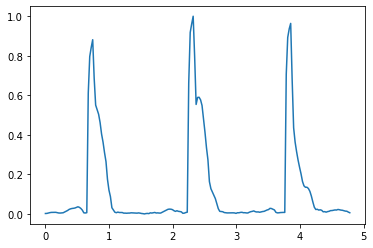

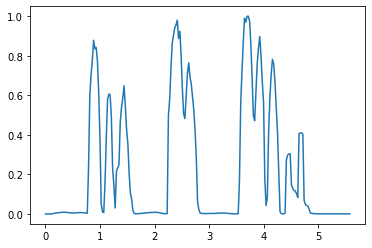

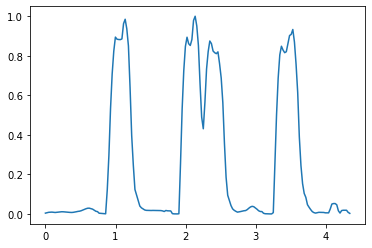

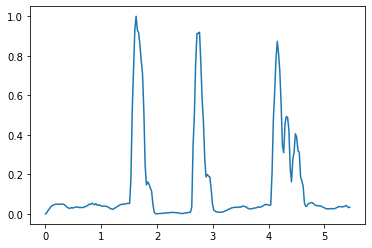

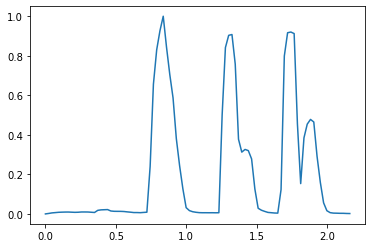

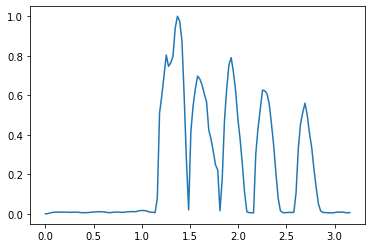

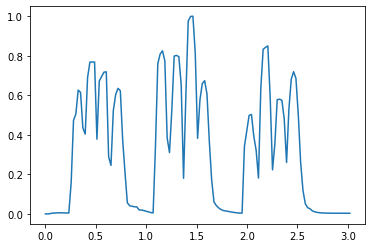

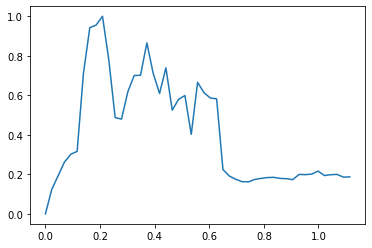

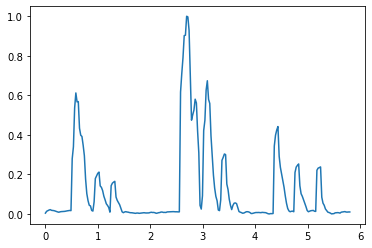

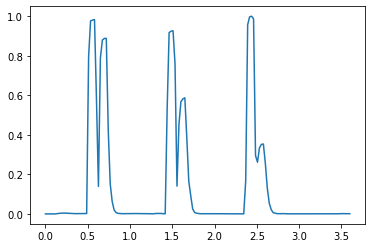

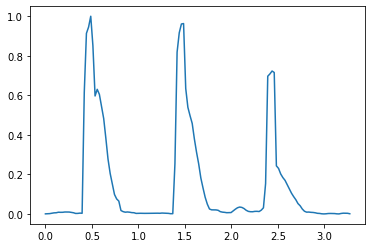

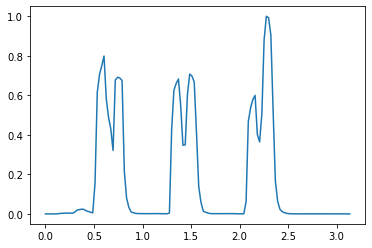

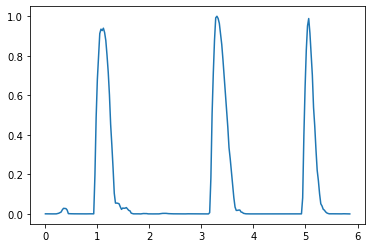

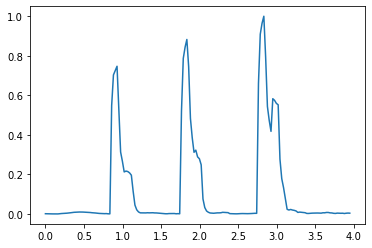

In [72]:
for i in wav_negative:
    rms = lb.feature.rms(y=i)
    times = lb.times_like(rms)
    rms = rms.reshape(rms.shape[1],rms.shape[0])
    rms_norm = Scaler.fit_transform(rms)
    #print(rms_norm)
    plt.figure()
    plt.plot(times, rms_norm, label='RMS Energy')
    plt.show()

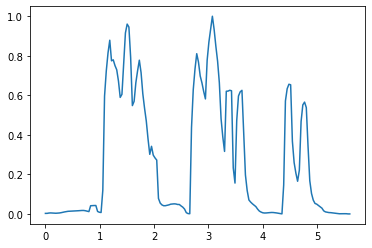

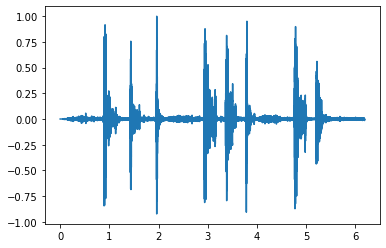

In [258]:
rms = lb.feature.rms(y=wav_negative[0])
times = lb.times_like(rms, sr=16000)
rms = rms.reshape(rms.shape[1],rms.shape[0])
rms_norm = Scaler.fit_transform(rms)
#print(rms_norm)
plt.figure()
plt.plot(times, rms_norm, label='RMS Energy')
plt.show()

times_1 = lb.times_like(wav_positive[0],sr=16000)
plt.figure()
plt.plot(times_1/500, wav_positive[0])
plt.show()

In [186]:
Audio(data=wav_positive[0],rate=16000)

In [216]:
a = 0
time_cut = []
start = []
end = []
for i in rms_norm:
    if i > 0.09:
        time_cut.append(times[a-3])
        if rms_norm[a+1] < 0.09:
            time_cut.append(times[a+3])
            start.append(time_cut[0])
            b = len(time_cut)
            end.append(time_cut[b-1])
            time_cut = []
            
    a=a+1

In [217]:
start

[0.736, 1.248, 1.76, 2.72, 3.136, 3.552, 4.512, 4.928]

In [218]:
end

[1.248, 1.696, 2.08, 3.232, 3.616, 3.904, 5.024, 5.344]

In [219]:
def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data) 
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]

In [227]:
sliced_data = slice_data(start=start[5], end=end[5], raw_data=wav_positive[0], sample_rate=16000)

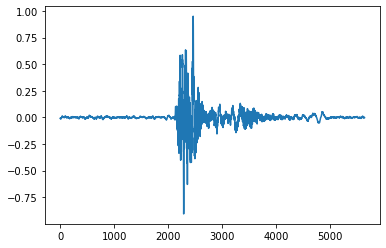

In [228]:
plt.plot(sliced_data)

In [229]:
sf.write(file='test_2.wav', data=sliced_data, samplerate=16000)

# Process Segmentation

In [259]:
if os.path.exists('result')==False:
    os.mkdir('result')
    
if os.path.exists('result/positive')==False:
    os.mkdir('result/positive')

if os.path.exists('result/negative')==False:
    os.mkdir('result/negative')

In [260]:
def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data) 
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]

In [261]:
for folder in os.listdir('segmentation'):
    for file in os.listdir(os.path.join('segmentation',folder)):
        filename = os.path.join('segmentation',folder,file)
        wav, sr = lb.load(filename, sr=None)
        
        rms = lb.feature.rms(y=wav)
        times = lb.times_like(rms, sr=16000)
        rms = rms.reshape(rms.shape[1],rms.shape[0])
        rms_norm = Scaler.fit_transform(rms)
        
        index = 0
        time_cut = []
        start = []
        end = []
        for value in rms_norm:
            if value > 0.06:
                time_cut.append(times[index-3])
                try:
                    if rms_norm[index+1] < 0.06:
                        time_cut.append(times[index+3])

                        start.append(time_cut[0])
                        end_index = len(time_cut)
                        end.append(time_cut[end_index-1])
                        time_cut = []
                except:
                    time_cut.append(times[index])

                    start.append(time_cut[0])
                    end_index = len(time_cut)
                    end.append(time_cut[end_index-1])
                    time_cut = []

            index=index+1
        
        for num in range(len(start)):
            sliced_data = slice_data(start=start[num], end=end[num], raw_data=wav, sample_rate=16000)
            fn = file.split('.')[0]+'_'+str(num)+'.wav'
            path = os.path.join('result',folder,fn)
            print(fn)
            sf.write(file=path, data=sliced_data, samplerate=16000)

test_018_0.wav
test_018_1.wav
test_018_2.wav
test_018_3.wav
test_018_4.wav
test_023_0.wav
test_023_1.wav
test_023_2.wav
test_024_0.wav
test_024_1.wav
test_024_2.wav
test_025_0.wav
test_025_1.wav
test_025_2.wav
test_045_0.wav
test_045_1.wav
test_045_2.wav
test_049_0.wav
test_049_1.wav
test_049_2.wav
test_051_0.wav
test_051_1.wav
test_051_2.wav
test_055_0.wav
test_055_1.wav
test_055_2.wav
test_055_3.wav
test_055_4.wav
test_057_0.wav
test_057_1.wav
test_057_2.wav
test_057_3.wav
test_057_4.wav
test_063_0.wav
test_063_1.wav
test_063_2.wav
test_072_0.wav
test_072_1.wav
test_072_2.wav
test_072_3.wav
test_072_4.wav
test_072_5.wav
test_072_6.wav
test_072_7.wav
test_072_8.wav
test_072_9.wav
test_072_10.wav
test_081_0.wav
test_081_1.wav
test_081_2.wav
test_095_0.wav
test_095_1.wav
test_095_2.wav
test_097_0.wav
test_097_1.wav
test_097_2.wav
test_097_3.wav
test_097_4.wav
test_118_0.wav
test_118_1.wav
test_118_2.wav
test_118_3.wav
test_118_4.wav
test_118_5.wav
test_120_0.wav
test_120_1.wav
test_120_